In [15]:
car_img_path = "/content/car1 (1).jpeg"

In [16]:
car_img_path

'/content/car1 (1).jpeg'

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 #openCV for work on image and videos

In [18]:
img = cv2.imread(car_img_path)

In [19]:
img

array([[[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       ...,

       [[216, 216, 216],
        [216, 216, 216],
        [216, 216, 216],
        ...,
        [211, 211, 211],
        [211, 211, 211],
        [211, 211, 211]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [213, 213, 213],
        [213, 213, 213],
        [213, 213, 213]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]]

In [21]:
img.shape

(168, 300, 3)

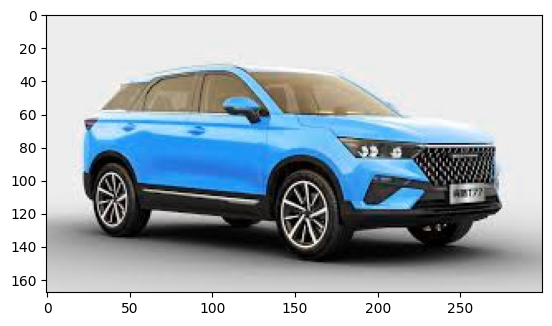

In [22]:
plt.imshow(img)

In [23]:
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [24]:
img1.shape

(168, 300, 3)

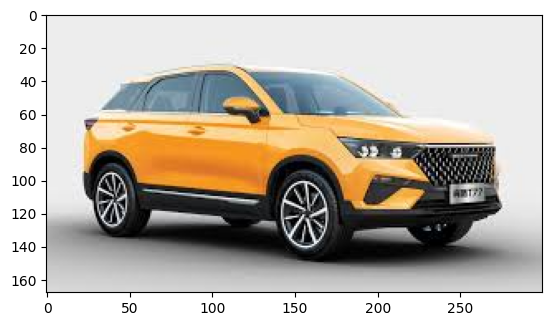

In [25]:
plt.imshow(img1)

In [26]:
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [27]:
img2.shape

(168, 300)

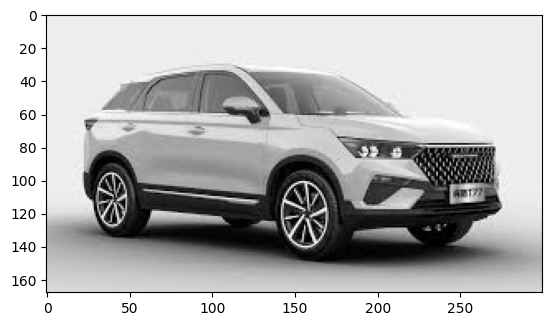

In [29]:
plt.imshow(img2,cmap="gray")

In [30]:
row,col = img2.shape

In [31]:
row

168

In [32]:
col

300

In [34]:
car = img2.reshape(1,row,col,1)

In [38]:
car.shape[:]

(1, 168, 300, 1)

In [36]:
CONV_LAYER = [
    tf.keras.layers.Conv2D(
        filters=1,
        kernel_size = (3,3),
        strides=(1,1),
        input_shape = car.shape[1:]
    )
]

In [39]:
conv_model = tf.keras.Sequential(CONV_LAYER)

In [40]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
output = conv_model.predict(car)

1/1 [==============================] - 8s 8s/step


In [49]:
output.shape[1:-1]

(166, 298)

In [43]:
((168+0-3)//1)+1

166

In [53]:
row,col = output.shape[1:-1]

In [54]:
reshape_output = output.reshape(row,col)

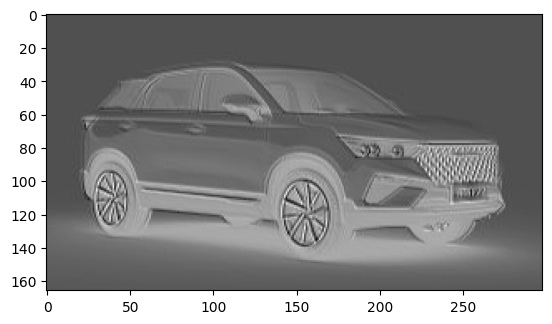

In [56]:
plt.imshow(reshape_output,cmap="gray")

In [60]:
row,col,channel = img1.shape

In [61]:
colour_car = img1

In [62]:
reshape_colour_car = colour_car.reshape(1,row,col,channel)

In [66]:
reshape_colour_car.shape

(1, 168, 300, 3)

In [67]:
reshape_colour_car.shape[1:]

(168, 300, 3)

In [78]:
CONV_LAYER = [
    tf.keras.layers.Conv2D(
        filters=1,
        kernel_size = (3,3),
        strides=(1,1),
        input_shape = reshape_colour_car.shape[1:]
    )
]

In [79]:
conv_model = tf.keras.Sequential(CONV_LAYER)

In [80]:
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
output = conv_model.predict(reshape_colour_car)

1/1 [==============================] - 0s 42ms/step


In [82]:
output.shape[1:-1]

(166, 298)

In [83]:
row,col=output.shape[1:-1]

In [84]:
reshaped_out=output.reshape(row,col)

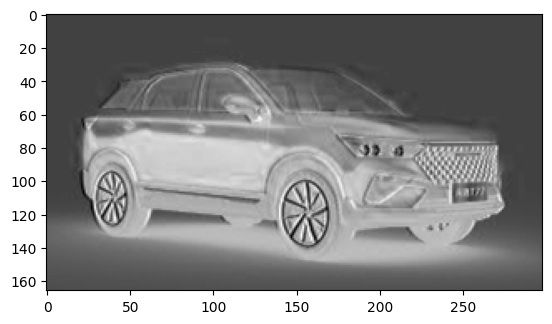

In [85]:
plt.imshow(reshaped_out,cmap="gray")

In [92]:

def reshaping(img,grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) #grayscale
    return img

  row,col,depth  = img.shape
  color_img = img.reshape(1,row,col,depth) # coloured

  return color_img

In [93]:
def get_colv_model(
    filters=1,
    filter_size = (3,3),
    strides = (1,1),
    input_shape = None,
    padding = "valid"):

  CONV_LAYER = [
    tf.keras.layers.Conv2D(
        filters=filters,
        kernel_size = filter_size,
        strides=strides,
        input_shape = input_shape,
        padding = padding)]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [99]:
def apply_comv_model_and_plot(img,conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    row,col,depth = out.shape[1:]
    reshape_out = out.reshape(row,col,depth)

    for i in range(depth):
      plt.imshow(reshape_out[:,:,i],cmap="gray")
      plt.show()

  except Exception as e:
    raise e


In [94]:
input_img = reshaping(colour_car,grayscale=False)

In [95]:
input_img

array([[[[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],

        [[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],

        [[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],

        ...,

        [[216, 216, 216],
         [216, 216, 216],
         [216, 216, 216],
         ...,
         [211, 211, 211],
         [211, 211, 211],
         [211, 211, 211]],

        [[217, 217, 217],
         [217, 217, 217],
         [217, 217, 217],
         ...,
         [213, 213, 213],
         [213, 213, 213],
         [213, 213, 213]],

        [[217, 217, 217],
         [217, 217, 217],
         [217, 217, 217],
         ...,
         [214, 214, 214],
        

In [101]:
model = get_colv_model(filters = 20,filter_size=(3,3),strides=(1,1),input_shape=input_img.shape[1:])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 20)      560       
                                                                 
Total params: 560 (2.19 KB)
Trainable params: 560 (2.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
apply_comv_model_and_plot(input_img,model)

Output hidden; open in https://colab.research.google.com to view.

In [103]:
my = "/content/wp6918284.webp"

In [108]:
ace = cv2.imread(my)

In [109]:
ace

array([[[224, 239, 236],
        [224, 239, 236],
        [224, 239, 236],
        ...,
        [212, 232, 254],
        [211, 231, 255],
        [209, 230, 255]],

       [[224, 239, 236],
        [224, 239, 236],
        [224, 239, 236],
        ...,
        [212, 233, 252],
        [211, 231, 255],
        [209, 230, 255]],

       [[224, 239, 236],
        [224, 239, 236],
        [224, 239, 236],
        ...,
        [213, 234, 253],
        [212, 233, 255],
        [210, 232, 255]],

       ...,

       [[ 50, 145, 241],
        [ 51, 146, 242],
        [ 52, 145, 241],
        ...,
        [147, 188, 248],
        [147, 188, 248],
        [147, 188, 248]],

       [[ 52, 152, 247],
        [ 48, 148, 244],
        [ 46, 143, 239],
        ...,
        [147, 188, 248],
        [147, 188, 248],
        [147, 188, 248]],

       [[ 51, 153, 248],
        [ 45, 145, 240],
        [ 41, 139, 234],
        ...,
        [147, 188, 248],
        [147, 188, 248],
        [147, 188, 248]]

In [110]:
input_img = reshaping(ace,grayscale=False)

In [111]:
input_img

array([[[[224, 239, 236],
         [224, 239, 236],
         [224, 239, 236],
         ...,
         [212, 232, 254],
         [211, 231, 255],
         [209, 230, 255]],

        [[224, 239, 236],
         [224, 239, 236],
         [224, 239, 236],
         ...,
         [212, 233, 252],
         [211, 231, 255],
         [209, 230, 255]],

        [[224, 239, 236],
         [224, 239, 236],
         [224, 239, 236],
         ...,
         [213, 234, 253],
         [212, 233, 255],
         [210, 232, 255]],

        ...,

        [[ 50, 145, 241],
         [ 51, 146, 242],
         [ 52, 145, 241],
         ...,
         [147, 188, 248],
         [147, 188, 248],
         [147, 188, 248]],

        [[ 52, 152, 247],
         [ 48, 148, 244],
         [ 46, 143, 239],
         ...,
         [147, 188, 248],
         [147, 188, 248],
         [147, 188, 248]],

        [[ 51, 153, 248],
         [ 45, 145, 240],
         [ 41, 139, 234],
         ...,
         [147, 188, 248],
        

In [112]:
model = get_colv_model(filters = 20,filter_size=(3,3),strides=(1,1),input_shape=input_img.shape[1:])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 2158, 3838, 20)    560       
                                                                 
Total params: 560 (2.19 KB)
Trainable params: 560 (2.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
apply_comv_model_and_plot(input_img,model)

Output hidden; open in https://colab.research.google.com to view.